<a href="https://colab.research.google.com/github/Ruby-pearl1/ores5160-2025/blob/main/week06/Intro_to_Pandas_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here is the data for this esercise:**
Download the following file and upload it using the code block above. Then rename the long file name to airquality.csv.

https://drive.google.com/file/d/1SBD8R6jl5_ycl3X7hulrlHpqR-w3i__a/view?usp=drive_link

The information below is for licensing compliance purposes per dataset owner instructions.

License: https://creativecommons.org/licenses/by-sa/4.0/.
Data Source: https://openaq.org/#/about.
Changes: Subset by country US and limited to the most recent week of data in the dataset
The interactive tables feature only supports 20,000 rows, and this file has a lot more than that, so we are going to read it in and tell Pandas to only look at the first 10,000 rows. When we are just getting a sense for the type of data in the file, this is fine. Later if we need to read all of the data, we can simply remove the nrows= flag from the code.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instructions


*   Use Google Colab or your preferred Python environment.
*   Upload the dataset(s) as instructed in each question.




Q1. Upload and Preview Data

	1.	Upload the file airquality.csv to your Colab environment.\\

	2.	Load the first 10,000 rows into a Pandas dataframe called airquality.\\

	3.	Display the first 5 rows of the dataframe.\\

In [4]:
from google.colab import files
import os

# 1) Click the "Choose Files" button and select the downloaded file from your computer.
uploaded = files.upload()

# 2) Rename whatever you uploaded to exactly 'airquality.csv'
orig_name = next(iter(uploaded.keys()))
os.rename(orig_name, "airquality.csv")
print("Renamed", orig_name, "→ airquality.csv")


Saving edited_us_air_quality_one_week_2022_06_23.csv to edited_us_air_quality_one_week_2022_06_23.csv
Renamed edited_us_air_quality_one_week_2022_06_23.csv → airquality.csv


In [5]:
import pandas as pd

airquality = pd.read_csv("airquality.csv", nrows=10_000, low_memory=False)


In [6]:
airquality.head()


,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time
0,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-26,05:00:00
1,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.68,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-19,07:00:00
2,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.63,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,20:00:00
3,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.86,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-20,04:00:00
4,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,10:00:00


Q2. Data Summary and Cleaning

	1.	Use .info() and .describe(include="all") to explore the dataset.\\

	2.	Identify any columns that have missing (NaN) values.\\

	3.	Drop all rows that contain missing values.\\

In [7]:
# View basic information about the dataframe
airquality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                10000 non-null  object 
 1   city                    10000 non-null  object 
 2   country                 10000 non-null  object 
 3   pollutant               10000 non-null  object 
 4   value                   10000 non-null  float64
 5   unit                    10000 non-null  object 
 6   source_name             10000 non-null  object 
 7   latitude                10000 non-null  int64  
 8   longitude               10000 non-null  float64
 9   averaged_over_in_hours  10000 non-null  float64
 10  location_geom           10000 non-null  object 
 11  date                    10000 non-null  object 
 12  time                    10000 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.8+ KB


In [8]:
# Get summary statistics for all columns (numeric and non-numeric)
airquality.describe(include="all")


,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time
count,10000,10000,10000,10000,10000.000000,10000,10000,10000.0,10000.000000,10000.000000,10000,10000,10000
unique,170,98,1,2,NaN,2,1,NaN,NaN,NaN,174,8,24
top,Near Road,San Francisco-Oakland-Fremont,US,co,NaN,ppm,AirNow,NaN,NaN,NaN,POINT(38.921848 1),2022-05-20,22:00:00
freq,174,636,10000,8992,NaN,8992,10000,NaN,NaN,NaN,116,1440,1028
mean,NaN,NaN,NaN,NaN,0.249050,NaN,NaN,1.0,38.586658,-100.618841,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.250206,NaN,NaN,0.0,5.103384,19.736708,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-0.010000,NaN,NaN,1.0,21.310301,-158.088593,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.120000,NaN,NaN,1.0,35.241100,-117.952586,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,1.0,38.656449,-104.987198,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,1.0,41.259478,-81.606834,NaN,NaN,NaN


In [9]:
# Count missing (NaN) values per column
airquality.isnull().sum()


,0
location,0
city,0
country,0
pollutant,0
value,0
unit,0
source_name,0
latitude,0
longitude,0
averaged_over_in_hours,0


In [20]:
# Show all rows that have at least one missing value
airquality[airquality.isnull().any(axis=1)]


,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time


In [21]:
# Drop rows with any missing (NaN) values
airquality = airquality.dropna()

In [18]:
# Confirm all missing values are gone
airquality.isnull().sum()


,0
location,0
city,0
country,0
pollutant,0
value,0
unit,0
source_name,0
latitude,0
longitude,0
averaged_over_in_hours,0


Q3. Data Visualization

	1.	Create a histogram of the pm25 values.\\

	2.	Create a boxplot for the pm25 column.\\


In [22]:
import pandas as pd
import matplotlib.pyplot as plt


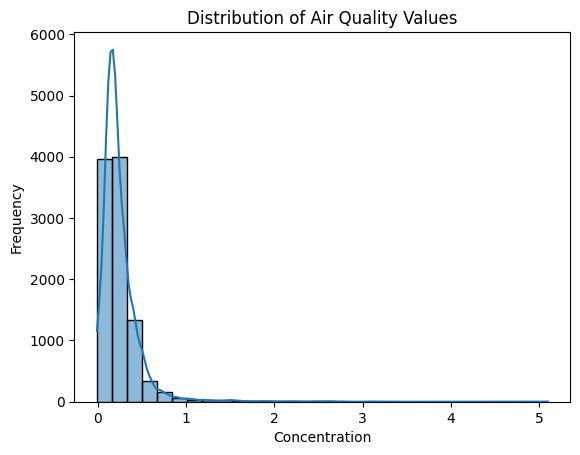

In [29]:
import seaborn as sns

# Histogram
sns.histplot(airquality['value'], bins=30, kde=True)
plt.title('Distribution of Air Quality Values')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.show()

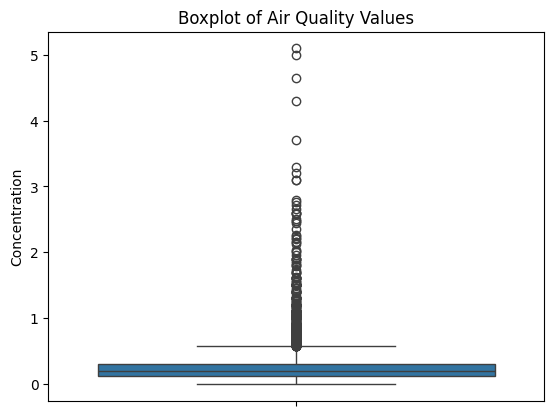

In [31]:
# Boxplot
sns.boxplot(y=airquality['value'])
plt.title('Boxplot of Air Quality Values')
plt.ylabel('Concentration')
plt.show()


## Submitting Your Work

Save you work to the path week07/week07_assignment_pandas.ipynb